# 4.4 실습 2 - 보스턴 집 값 예측

* **분석데이터**: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html?highlight=boston#sklearn.datasets.load_boston

## 4.4.1 문제 정의 및 학습 데이터 준비

### 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [2]:
boston_df = pd.DataFrame(boston.data , columns = boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston_df.shape

(506, 14)

In [4]:
# 결측값 확인
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [5]:
# 중복값 확인
boston_df.duplicated().sum()

0

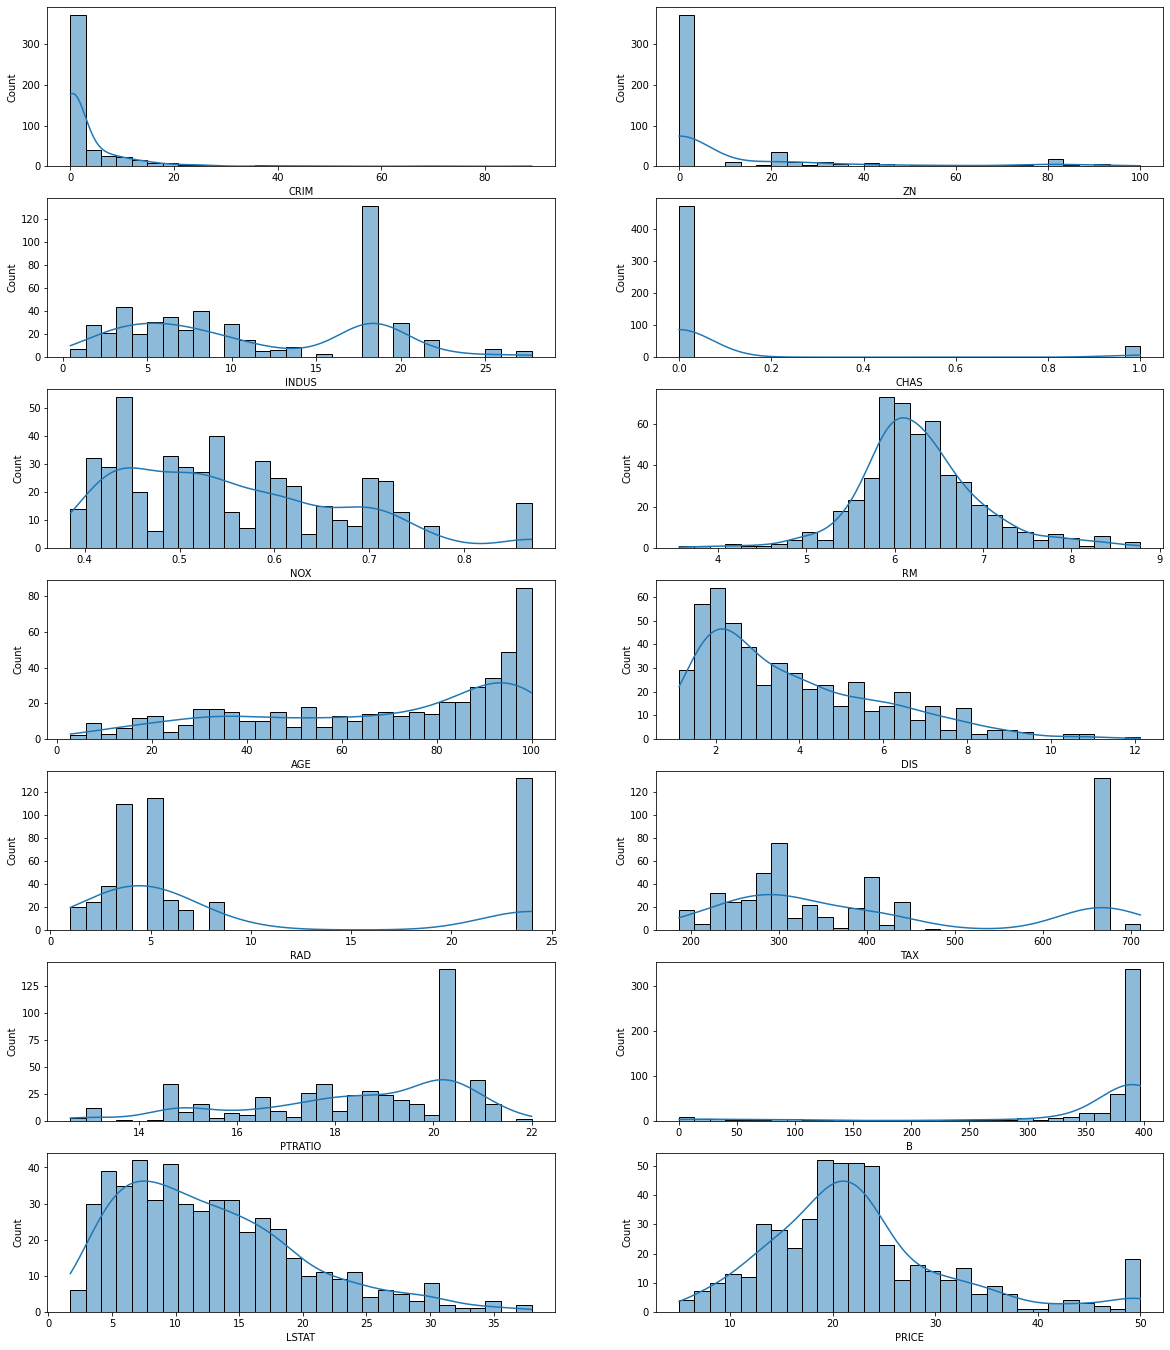

In [6]:
# 데이터 분포 확인 - 히스토그램
nrows = 7
ncols = 2

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 24)

for i in range(nrows):
    for j in range(ncols):
        num = i * ncols + j
        sns.histplot(x=boston_df.columns[num], data=boston_df, kde=True, bins=30, ax=axs[i][j])

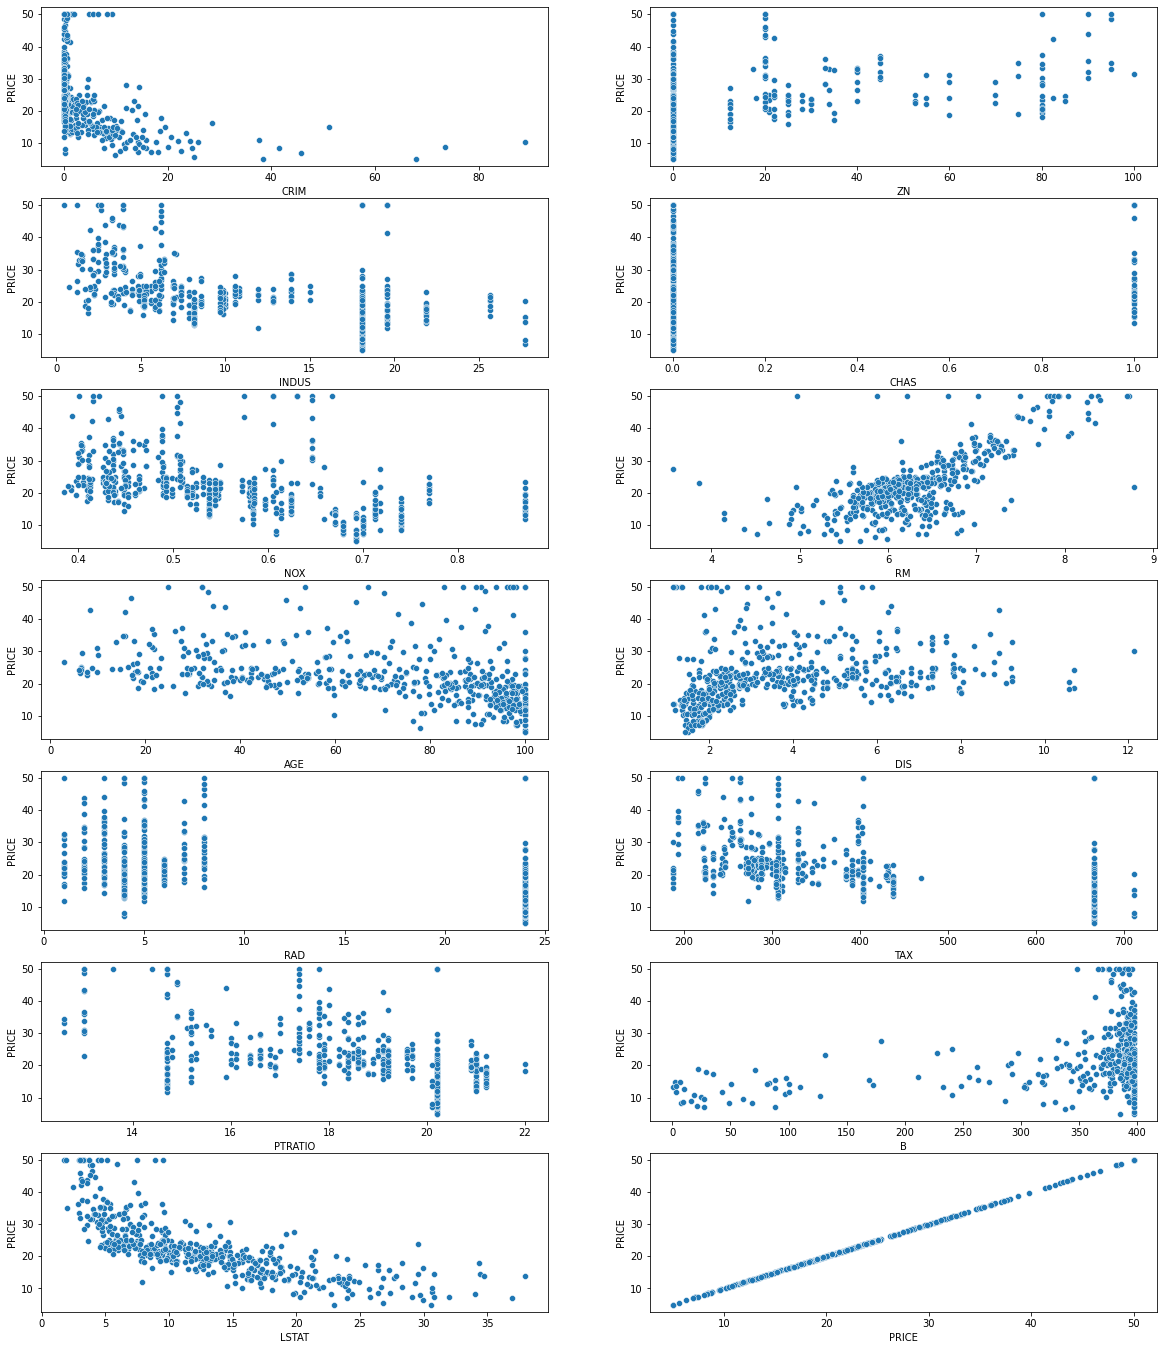

In [7]:
# 데이터 분포 확인 - 산점도
nrows = 7
ncols = 2

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 24)

for i in range(nrows):
    for j in range(ncols):
        num = i * ncols + j
        sns.scatterplot(x=boston_df.columns[num], y='PRICE', data=boston_df, ax=axs[i][j])

In [8]:
# 데이터 분포 확인 - 변수 간 상관관계
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


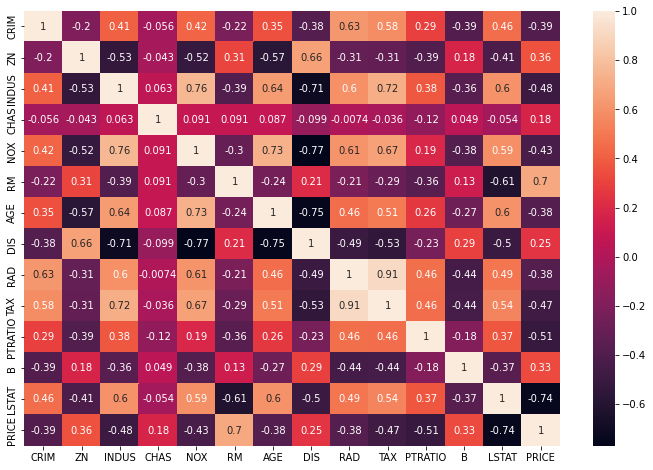

In [9]:
# 데이터 분포 확인 - 변수 간 상관관계(히트맵)
plt.figure(figsize=(12, 8))
sns.heatmap(boston_df.corr(), annot=True)

In [10]:
np.abs(boston_df.corr()['PRICE']).sort_values(ascending=False)

PRICE      1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: PRICE, dtype: float64

### 데이터분할

In [11]:
from sklearn.model_selection import train_test_split

y = boston_df['PRICE']
X = boston_df.drop(['PRICE'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4.4.2 학습 - 선형회귀 모델

In [12]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('weight:', lr_model.coef_)
print('bias:',lr_model.intercept_)

weight: [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
bias: 31.631084035691632


In [13]:
coef = pd.Series(data=np.round(lr_model.coef_, 1), index=X.columns )
coef

CRIM       -0.1
ZN          0.0
INDUS       0.0
CHAS        3.1
NOX       -15.4
RM          4.1
AGE        -0.0
DIS        -1.4
RAD         0.2
TAX        -0.0
PTRATIO    -0.9
B           0.0
LSTAT      -0.5
dtype: float64

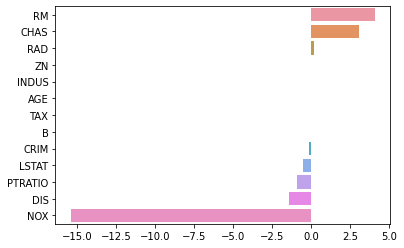

In [14]:
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

### 평가

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse , rmse, r2))


y_pred = lr_model.predict(X_test)
printRegressorResult(y_test, y_pred)

MSE : 21.517 , RMSE : 4.639, r2 : 0.711


In [16]:
result = pd.DataFrame({'y': y_test.values, 'y_pred': y_pred, 'diff': np.abs(y_test.values - y_pred)})
result.sort_values(by=['diff'], ascending=False)

,y,y_pred,diff
96,50.0,24.822491,25.177509
97,17.9,-0.477121,18.377121
12,7.0,-6.865435,13.865435
94,27.5,14.032417,13.467583
32,15.0,25.313725,10.313725
...,...,...,...
72,10.8,10.943170,0.143170
62,31.5,31.635220,0.135220
139,15.6,15.466213,0.133787
7,14.0,14.078599,0.078599


## 4.4.3 학습 - 선형회귀모델 응용
### ① 독립변수 선택

In [17]:
from sklearn.feature_selection import SelectKBest, f_regression

# k = 3
X_selected = SelectKBest(score_func = f_regression, k = 3)
X_selected.fit_transform(X, y)
features = X.columns[X_selected.get_support()]    
print('features = {}'.format(features))

features = Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')


In [18]:
X_selected = boston_df[features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

lr_model2 = LinearRegression()
lr_model2.fit(X_train, y_train)

# print('weight:', lr_model2.coef_)
# print('bias:',lr_model2.intercept_)

y_pred = lr_model2.predict(X_test)
printRegressorResult(y_test, y_pred)

MSE : 26.012 , RMSE : 5.100, r2 : 0.651


### ② 다항회귀(PolynomialFeatures)모델

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_selected)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

y_pred = poly_model.predict(X_test)
printRegressorResult(y_test, y_pred)   

MSE : 17.266 , RMSE : 4.155, r2 : 0.768


### ③ 데이터 전처리(StandardScaler)

In [20]:
from sklearn.preprocessing import StandardScaler
X_selected_scaled = StandardScaler().fit_transform(X_selected)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

lr_model3 = LinearRegression()
lr_model3.fit(X_train, y_train)

y_pred = lr_model3.predict(X_test)
printRegressorResult(y_test, y_pred)

MSE : 26.012 , RMSE : 5.100, r2 : 0.651


In [21]:
X_selected.columns

Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')

RM         0.403612
PTRATIO   -0.802325
LSTAT      0.906460
dtype: float64

PRICE: 1.11


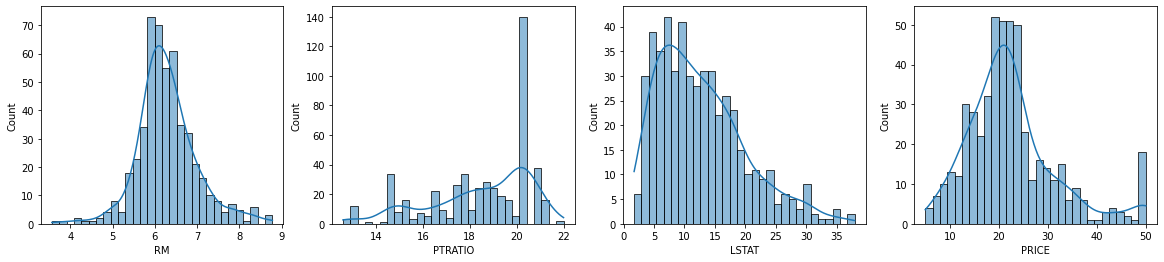

In [22]:
# 데이터 분포 확인 - 히스토그램
nrows = 1
ncols = 4

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 4)

sns.histplot(x= X_selected.columns[0], data = X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x= X_selected.columns[1], data = X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x= X_selected.columns[2], data = X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x= y, data = y, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\nPRICE: {0:.2f}'.format(y.skew()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


RM         0.403612
PTRATIO   -0.802325
LSTAT     -0.187195
dtype: float64

PRICE: -0.24


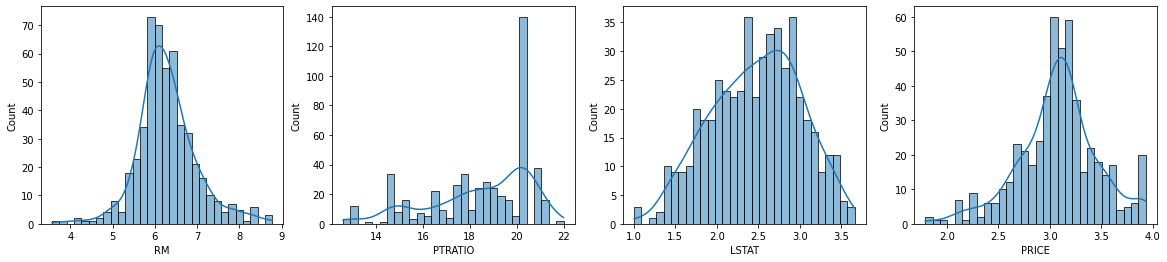

In [23]:
X_selected['LSTAT'] = np.log1p(X_selected['LSTAT'])
y = np.log1p(y)

# 데이터 분포 확인 - 히스토그램
nrows = 1
ncols = 4

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 4)

sns.histplot(x= X_selected.columns[0], data = X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x= X_selected.columns[1], data = X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x= X_selected.columns[2], data = X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x= y, data = y, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\nPRICE: {0:.2f}'.format(y.skew()))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

lr_model4 = LinearRegression()
lr_model4.fit(X_train, y_train)

y_pred = lr_model4.predict(X_test) 
mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
rmse = np.sqrt(mse)
r2 = r2_score(np.expm1(y_test), np.expm1(y_pred))
print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse , rmse, r2))

MSE : 21.738 , RMSE : 4.662, r2 : 0.708


### (Tip) 교차검증(cross_validate)

In [25]:
from sklearn.model_selection import cross_validate

# cv: 3개의 train, test set fold 로 나누어 학습 
scores = cross_validate(lr_model, X, y, scoring="neg_mean_squared_error", cv=3, return_train_score=True, return_estimator=True)
print('Scores', scores)

mse = (-1 * scores['train_score'])
print('MSE:', mse)

rmse  = np.sqrt(-1 * scores['train_score'])
print('RMSE:', rmse)

print('RMSE 평균: {0:.3f} '.format(np.mean(rmse)))

Scores {'fit_time': array([0.00404978, 0.00370312, 0.00274253]), 'score_time': array([0.00262642, 0.00237656, 0.00244737]), 'estimator': [LinearRegression(), LinearRegression(), LinearRegression()], 'test_score': array([-0.03172799, -0.02961277, -0.23799131]), 'train_score': array([-0.03707959, -0.03616879, -0.00994798])}
MSE: [0.03707959 0.03616879 0.00994798]
RMSE: [0.1925606  0.19018094 0.09973957]
RMSE 평균: 0.161 


## 4.4.4. 학습 -  의사결정나무 기반 회귀 모델

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

LGBMRegressor(random_state=42)

In [28]:
model_list = [lr_model, forest_model, lgb_model]

for model in model_list:
    model.fit(X_train , y_train)
    y_preds = model.predict(X_test)
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_preds)
    model_name = model.__class__.__name__
    print('{0} MSE : {1:.3f} , RMSE : {2:.3f}, r2 : {3:.3f}'.format(model_name, mse , rmse, r2)) 

LinearRegression MSE : 0.042 , RMSE : 0.204, r2 : 0.697
RandomForestRegressor MSE : 0.037 , RMSE : 0.193, r2 : 0.728
LGBMRegressor MSE : 0.038 , RMSE : 0.194, r2 : 0.726


In [29]:
from lightgbm import LGBMRegressor

lgb_model2 = LGBMRegressor(n_estimators=100)
evals = [(X_train , y_train), (X_test, y_test)]
lgb_model2.fit(X_train, y_train, early_stopping_rounds=10, eval_set=evals)
y_preds = lgb_model2.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)
print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse , rmse, r2))

[1]	training's l2: 0.13032	valid_1's l2: 0.121914
Training until validation scores don't improve for 10 rounds.
[2]	training's l2: 0.111649	valid_1's l2: 0.106239
[3]	training's l2: 0.0963274	valid_1's l2: 0.0938509
[4]	training's l2: 0.0839211	valid_1's l2: 0.0839548
[5]	training's l2: 0.0729295	valid_1's l2: 0.0743742
[6]	training's l2: 0.0646933	valid_1's l2: 0.0680794
[7]	training's l2: 0.0573768	valid_1's l2: 0.0613443
[8]	training's l2: 0.0512659	valid_1's l2: 0.0562871
[9]	training's l2: 0.0463778	valid_1's l2: 0.0522571
[10]	training's l2: 0.0422984	valid_1's l2: 0.0487656
[11]	training's l2: 0.0389325	valid_1's l2: 0.0461578
[12]	training's l2: 0.0360885	valid_1's l2: 0.0440048
[13]	training's l2: 0.0338622	valid_1's l2: 0.0423731
[14]	training's l2: 0.0318815	valid_1's l2: 0.0410313
[15]	training's l2: 0.0303058	valid_1's l2: 0.0399081
[16]	training's l2: 0.0289856	valid_1's l2: 0.0390552
[17]	training's l2: 0.0277866	valid_1's l2: 0.0384612
[18]	training's l2: 0.0268712	vali

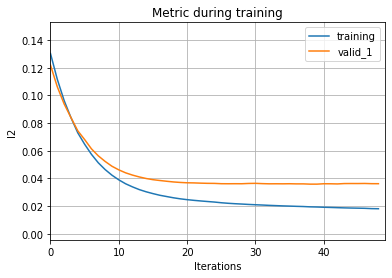

In [30]:
import lightgbm as lgb
lgb.plot_metric(lgb_model2)

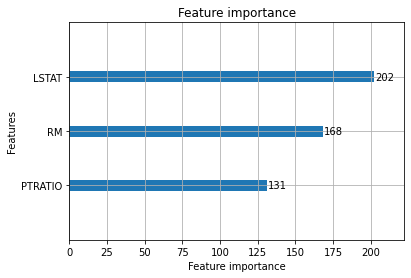

In [31]:
lgb.plot_importance(lgb_model2)